In [1]:
#Use "%" for plotting software to work

%matplotlib inline
import matplotlib.pyplot as plt
import numpy
%pylab inline
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import mpl_toolkits
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


C:\Users\vivian.wang1\AppData\Local\Continuum\anaconda333\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('WGU budget allocation.csv')

In [3]:
data = data.fillna(0)

# National

In [4]:
data['Month'] = pd.to_datetime(data['Month']).apply(lambda x: x.to_julian_date())

In [5]:
data = data.dropna()
data.head()

,Month,natleads,natoff,naton,nattotal,natcpl,inleads,inoff,inon,intotal,...,watotstock,juldummy,seasq1,seasq2,seasq3,seasq4,natoffon,natoffonstock,csi,modummy
0,2455773.5,10732,98519.0,1033975.0,1132494.0,105.524972,1406,182163.92,96296,278459.92,...,348347.0000,0,1,0,0,0,1.020000e+11,1.020000e+11,63.7,7
1,2455804.5,13684,98519.0,999091.0,1097610.0,80.211196,2799,289900.01,121439,411339.01,...,401869.7064,0,1,0,0,0,9.840000e+10,1.650000e+11,55.8,8
2,2455834.5,10541,98519.0,918573.0,1017092.0,96.489138,1712,186293.67,105141,291434.67,...,338694.2082,0,1,0,0,0,9.050000e+10,1.750000e+11,59.5,9
3,2455865.5,9011,0.0,843470.0,843470.0,93.604483,1520,181776.31,99299,281075.31,...,448506.1082,0,0,1,0,0,0.000000e+00,5.050000e+10,60.8,10
4,2455895.5,8276,0.0,783227.0,783227.0,94.638352,1179,172345.05,94739,267084.05,...,343791.3857,0,0,1,0,0,0.000000e+00,1.440000e+10,63.7,11


Axes(0.125,0.125;0.775x0.755)


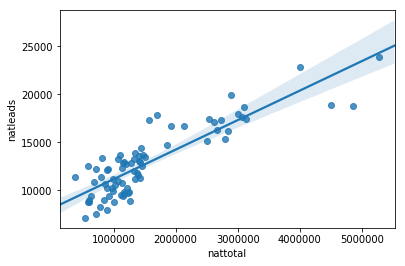

In [6]:
natscat = sns.regplot(x="nattotal", y="natleads", scatter=True, data=data)
plt.xlabel('nattotal')
plt.ylabel('natleads')
print(natscat)

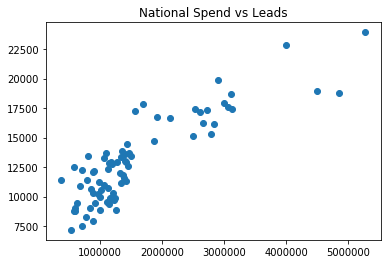

In [7]:
plt.scatter(data.nattotal,data.natleads)
plt.title("National Spend vs Leads")

<b> Original R2: 0.77 </b>
<p><i> juldummy, seasq2, nattotstock </i></p>

In [8]:
print ("Original National Model")
natols = smf.ols('natleads ~ nattotstock + juldummy + seasq2', data=data).fit()
print (natols.summary())

Original National Model
                            OLS Regression Results                            
Dep. Variable:               natleads   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     144.8
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           1.19e-30
Time:                        17:21:49   Log-Likelihood:                -664.44
No. Observations:                  77   AIC:                             1337.
Df Residuals:                      73   BIC:                             1346.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8722.2670    

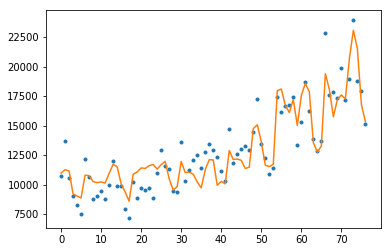

In [9]:
plt.plot(data['natleads'],'.',
        natols.predict(data),'-')

In [10]:
#Split into natoffstock and natonstok, and add seasonaity dummies
print ("National Model 1a")
natols1a = smf.ols('natleads ~ natoffstock + natonstock + juldummy + seasq2 + seasq3 + seasq4', data=data).fit()
print (natols1a.summary())

National Model 1a
                            OLS Regression Results                            
Dep. Variable:               natleads   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     68.25
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           2.77e-27
Time:                        17:21:49   Log-Likelihood:                -665.00
No. Observations:                  77   AIC:                             1344.
Df Residuals:                      70   BIC:                             1360.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8005.9409    783.12

In [11]:
pdata = pd.read_csv('WGU predict.csv')
natols1a.predict(pdata)

0     23057.413044
1     28736.236034
2     22550.886251
3     20959.639240
4     17493.357328
5     18016.686235
6     30484.088048
7     26001.378240
8     26077.199933
9     24256.971599
10    26579.500791
11    24592.059646
dtype: float64

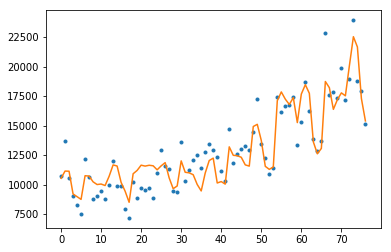

In [12]:
plt.plot(data['natleads'],'.',
        natols1a.predict(data),'-')

# Indiana

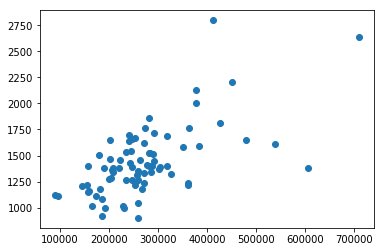

In [13]:
plt.scatter(data.intotal,data.inleads)

Axes(0.125,0.125;0.775x0.755)


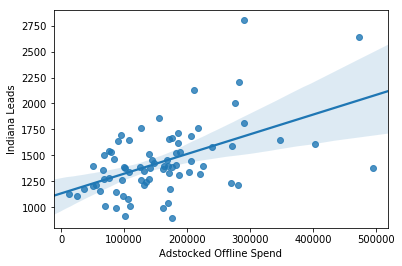

In [14]:
inscat = sns.regplot(x="inoffstock", y="inleads", scatter=True, data=data)
plt.xlabel('Adstocked Offline Spend')
plt.ylabel('Indiana Leads')
print(inscat)

<b>Original R2: 0.70</b>
<p>inoffstock, inonstock, natoff*on, juldummy, seasq1, seasq3, seasq4</p>

In [15]:
#using natoffon is not ok because when you use interaction vars you need to include the variables themselves
print ("Original IN Model")
inols = smf.ols('inleads ~ inoffstock + inonstock + natoffon + juldummy + seasq1 + seasq3 + seasq4', data=data).fit()
print (inols.summary())

Original IN Model
                            OLS Regression Results                            
Dep. Variable:                inleads   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     15.19
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           7.56e-12
Time:                        17:21:50   Log-Likelihood:                -520.49
No. Observations:                  77   AIC:                             1057.
Df Residuals:                      69   BIC:                             1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    718.4239    116.116  

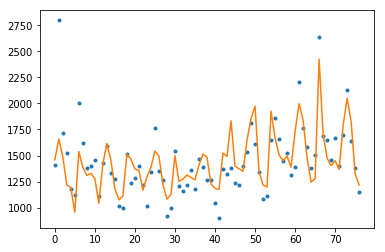

In [16]:
plt.plot(data['inleads'],'.',
        inols.predict(data),'-')

In [17]:
#using natoffon is not ok because when you use interaction vars you need to include the variables themselves
print ("Original IN Model 1")
inols1 = smf.ols('inleads ~ 0 + inoffstock*inonstock + natoffon + juldummy + seasq1 + seasq3 + seasq4', data=data).fit()
print (inols1.summary())

Original IN Model 1
                            OLS Regression Results                            
Dep. Variable:                inleads   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     326.2
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           1.12e-51
Time:                        17:21:50   Log-Likelihood:                -530.33
No. Observations:                  77   AIC:                             1077.
Df Residuals:                      69   BIC:                             1095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
inoffstock  

In [18]:
inols1.predict(pdata)

0     2445.415443
1     2300.788530
2     2368.679215
3     2001.543381
4     1652.403531
5     2006.683828
6     2817.137003
7     2561.219161
8     2481.442661
9     1952.699979
10    1776.592612
11    2104.261759
dtype: float64

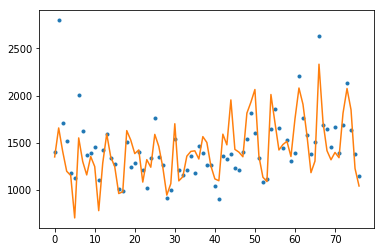

In [19]:
plt.plot(data['inleads'],'.',
        inols1.predict(data),'-')

In [20]:
print ("IN Model 8")
inols8 = smf.ols('inleads ~ inoffstock + inonstock + natoffon + juldummy + seasq1 + seasq3 + seasq4', data=data).fit()
print (inols8.summary())

IN Model 8
                            OLS Regression Results                            
Dep. Variable:                inleads   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     15.19
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           7.56e-12
Time:                        17:21:51   Log-Likelihood:                -520.49
No. Observations:                  77   AIC:                             1057.
Df Residuals:                      69   BIC:                             1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    718.4239    116.116      6.1

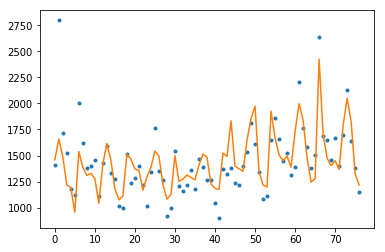

In [21]:
plt.plot(data['inleads'],'.',
        inols8.predict(data),'-')

In [22]:
inols8.predict(pdata)

0     2097.800796
1     2312.124685
2     1962.228671
3     1704.584942
4     1540.426648
5     1776.009572
6     2742.912204
7     2027.499887
8     2072.363111
9     1809.206540
10    1839.176847
11    1888.505416
dtype: float64

# Missouri

<b>Original R2: 0.85</b>

Axes(0.125,0.125;0.775x0.755)


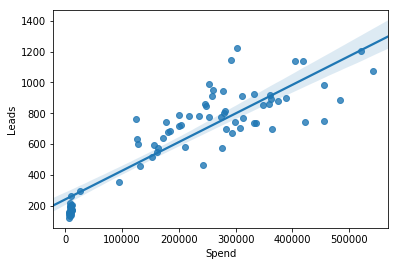

In [23]:
moscat = sns.regplot(x="mototal", y="moleads", scatter=True, data=data)
plt.xlabel('Spend')
plt.ylabel('Leads')
print(moscat)

In [24]:
print ("Original MO Model")
mools = smf.ols('moleads ~ mooffstock + moonstock + natoffon + seasq1 + seasq2 + seasq3', data=data).fit()
print (mools.summary())

Original MO Model
                            OLS Regression Results                            
Dep. Variable:                moleads   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     73.01
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           3.71e-28
Time:                        17:21:51   Log-Likelihood:                -474.77
No. Observations:                  77   AIC:                             963.5
Df Residuals:                      70   BIC:                             979.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    276.2945     37.815  

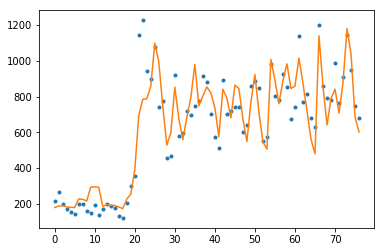

In [25]:
plt.plot(data['moleads'],'.',
        mools.predict(data),'-')

In [26]:
print ("MO Model 1a")
mools1a = smf.ols('moleads ~ mooffstock*moonstock + natoffon + seasq1 + seasq2 + seasq3 + juldummy', data=data).fit()
print (mools1a.summary())

MO Model 1a
                            OLS Regression Results                            
Dep. Variable:                moleads   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     64.97
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           7.70e-29
Time:                        17:21:52   Log-Likelihood:                -468.04
No. Observations:                  77   AIC:                             954.1
Df Residuals:                      68   BIC:                             975.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept           

In [27]:
mools1a.predict(pdata)

0      980.980312
1     1228.861814
2     1021.093108
3      848.094032
4      733.108580
5      779.650827
6     1549.575595
7      828.652567
8      996.776735
9      977.617631
10    1157.760517
11     956.370717
dtype: float64

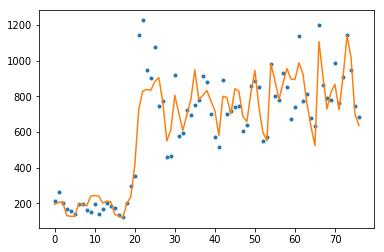

In [28]:
plt.plot(data['moleads'],'.',
        mools1a.predict(data),'-')

In [29]:
print ("MO Model 2")
mools2 = smf.ols('moleads ~ mooffstock + moonstock + natoffon + seasq1 + seasq2 + seasq3 + juldummy', data=data).fit()
print (mools2.summary())

MO Model 2
                            OLS Regression Results                            
Dep. Variable:                moleads   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     65.16
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           6.59e-28
Time:                        17:21:52   Log-Likelihood:                -472.94
No. Observations:                  77   AIC:                             961.9
Df Residuals:                      69   BIC:                             980.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    271.9754     37.270      7.2

In [30]:
mools2.predict(pdata)

0      922.407776
1     1123.789031
2      987.417737
3      867.346998
4      695.300777
5      744.872155
6     1560.983734
7      835.659831
8      986.163821
9      955.154640
10    1142.585012
11     940.089625
dtype: float64

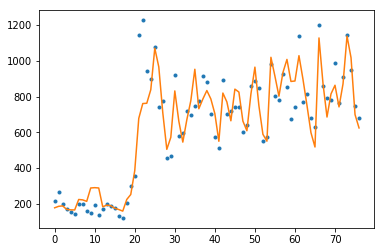

In [31]:
plt.plot(data['moleads'],'.',
        mools2.predict(data),'-')

# Nevada

Original R2: 0.94

Axes(0.125,0.125;0.775x0.755)


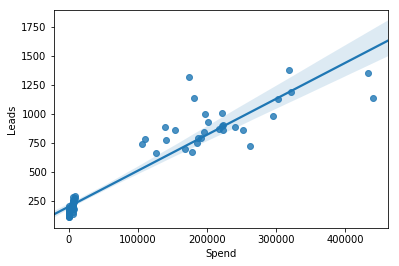

In [32]:
nvscat = sns.regplot(x="nvtotal", y="nvleads", scatter=True, data=data)
plt.xlabel('Spend')
plt.ylabel('Leads')
print(nvscat)

In [33]:
#updated interaction term
print ("NV Original Model 1")
nvols1 = smf.ols('nvleads ~ 0+ nvoffstock*nvonstock + nattotstock + seasq1 + seasq3 + seasq4', data=data).fit()
print (nvols1.summary())

NV Original Model 1
                            OLS Regression Results                            
Dep. Variable:                nvleads   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     259.5
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           1.91e-47
Time:                        17:21:52   Log-Likelihood:                -476.12
No. Observations:                  77   AIC:                             966.2
Df Residuals:                      70   BIC:                             982.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
nvoffstock  

In [34]:
nvols1.predict(pdata)

0     1307.380584
1     1459.515324
2     1078.692533
3      920.631931
4     1006.743828
5     1161.630447
6     1532.628836
7     1371.560530
8     1397.488091
9     1294.766018
10    1507.036655
11    1314.255166
dtype: float64

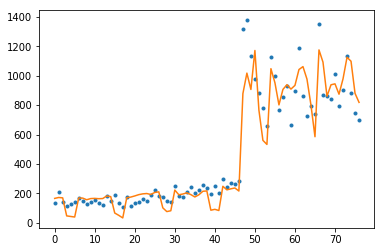

In [35]:
plt.plot(data['nvleads'],'.',
        nvols1.predict(data),'-')

In [36]:
print ("NV Original Model 2")
nvols2 = smf.ols('nvleads ~ 0 + nvoffstock + nvonstock + nattotstock + seasq1 + seasq3 + seasq4', data=data).fit()
print (nvols2.summary())

NV Original Model 2
                            OLS Regression Results                            
Dep. Variable:                nvleads   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     209.9
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           4.06e-43
Time:                        17:21:53   Log-Likelihood:                -490.11
No. Observations:                  77   AIC:                             992.2
Df Residuals:                      71   BIC:                             1006.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
nvoffstock      0.0030      0.

In [37]:
nvols2.predict(pdata)

0     1092.153707
1     1261.379399
2     1025.663671
3      844.099104
4      882.812768
5     1082.946661
6     1386.341078
7     1240.599946
8     1263.455706
9     1183.022668
10    1385.449757
11    1201.861410
dtype: float64

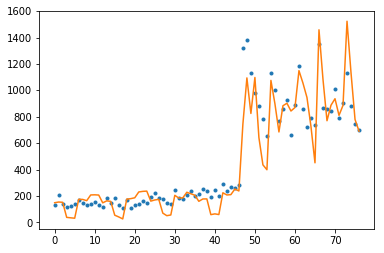

In [38]:
plt.plot(data['nvleads'],'.',
        nvols2.predict(data),'-')

In [39]:
nvols2.predict(data)

0      149.639509
1      155.015970
2      152.838423
3       38.856821
4       35.516132
5       32.346585
6      175.425384
7      174.727019
8      165.203528
9      208.502732
10     209.636626
11     207.789597
12     148.795731
13     163.773888
14     159.850705
15      55.362617
16      42.074889
17      27.127896
18     176.967860
19     180.583111
20     187.135601
21     231.183397
22     235.711589
23     237.631159
24     161.827408
25     170.563719
26     175.200528
27      71.020849
28      51.644571
29      56.986429
         ...     
47     745.495895
48    1094.530619
49     825.552241
50    1097.779735
51     642.403682
52     436.312565
53     399.512560
54    1075.699359
55     898.440022
56     685.436490
57     883.787636
58     902.755279
59     843.966659
60     870.402940
61    1149.593927
62    1055.175589
63     946.129860
64     725.981144
65     451.857754
66    1458.751736
67    1083.357833
68     770.463293
69     887.844207
70     936.935721
71     810

# Tennessee

Original R2: 0.92

Axes(0.125,0.125;0.775x0.755)


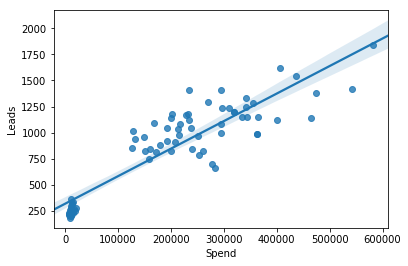

In [40]:
tnscat = sns.regplot(x="tntotal", y="tnleads", scatter=True, data=data)
plt.xlabel('Spend')
plt.ylabel('Leads')
print(tnscat)

In [41]:
print ("Original TN Model w/ interaction update")
tnols = smf.ols('tnleads ~ tnoffstock*tnonstock + natoffon + seasq2 + seasq3 + seasq4', data=data).fit()
print (tnols.summary())

Original TN Model w/ interaction update
                            OLS Regression Results                            
Dep. Variable:                tnleads   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     105.8
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           2.47e-34
Time:                        17:21:54   Log-Likelihood:                -482.22
No. Observations:                  77   AIC:                             980.4
Df Residuals:                      69   BIC:                             999.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

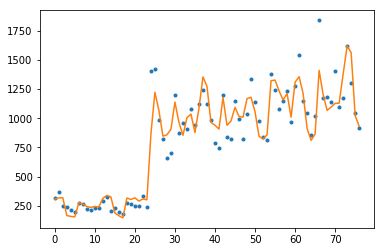

In [42]:
plt.plot(data['tnleads'],'.',
        tnols.predict(data),'-')

In [43]:
print ("TN Model 1a")
tnols1a = smf.ols('tnleads ~ tnoffstock*tnonstock + natoffon + seasq2 + seasq3 + seasq4 + juldummy', data=data).fit()
print (tnols1a.summary())

TN Model 1a
                            OLS Regression Results                            
Dep. Variable:                tnleads   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     98.47
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           2.46e-34
Time:                        17:21:54   Log-Likelihood:                -479.50
No. Observations:                  77   AIC:                             977.0
Df Residuals:                      68   BIC:                             998.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept           

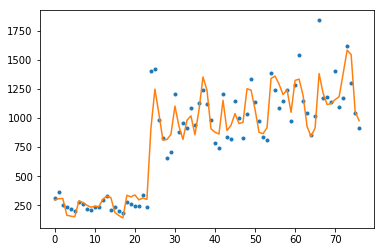

In [44]:
plt.plot(data['tnleads'],'.',
        tnols1a.predict(data),'-')

In [50]:
tnols1a.predict(pdata)

0     1412.561249
1     1730.518775
2     1379.783928
3     1243.471017
4      968.717625
5     1208.420254
6     2269.379538
7     1397.142600
8     1505.116336
9     1391.052075
10    1634.614480
11    1847.920437
dtype: float64

In [45]:
print ("TN Model 7")
tnols7 = smf.ols('tnleads ~ tnoffstock + tnonstock + natoffon + seasq2 + seasq3 + seasq4 + juldummy', data=data).fit()
print (tnols7.summary())

TN Model 7
                            OLS Regression Results                            
Dep. Variable:                tnleads   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     90.39
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           3.28e-32
Time:                        17:21:55   Log-Likelihood:                -487.71
No. Observations:                  77   AIC:                             991.4
Df Residuals:                      69   BIC:                             1010.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    305.6739     45.458      6.7

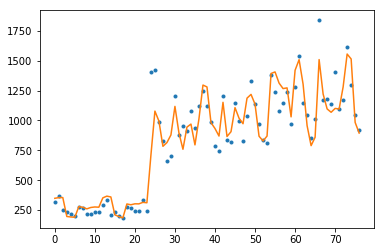

In [48]:
plt.plot(data['tnleads'],'.',
        tnols7.predict(data),'-')

In [49]:
tnols7.predict(pdata)

0     1216.706869
1     1469.011895
2     1318.752488
3     1132.480676
4      855.782915
5     1039.733640
6     1889.092592
7     1148.862066
8     1223.164644
9     1131.912757
10    1315.583523
11    1422.479689
dtype: float64

## Texas

Original R2: 0.79

Axes(0.125,0.125;0.775x0.755)


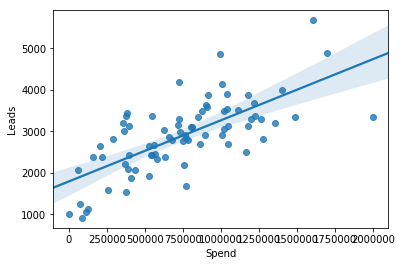

In [51]:
txscat = sns.regplot(x="txtotal", y="txleads", scatter=True, data=data)
plt.xlabel('Spend')
plt.ylabel('Leads')
print(txscat)

In [52]:
print ("Original TX Model")
txols = smf.ols('txleads ~ txoffstock + txonstock + natoffon + seasq2', data=data).fit()
print (txols.summary())

Original TX Model
                            OLS Regression Results                            
Dep. Variable:                txleads   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     63.10
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           8.48e-23
Time:                        17:33:11   Log-Likelihood:                -572.09
No. Observations:                  77   AIC:                             1154.
Df Residuals:                      72   BIC:                             1166.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1688.9738    142.112  

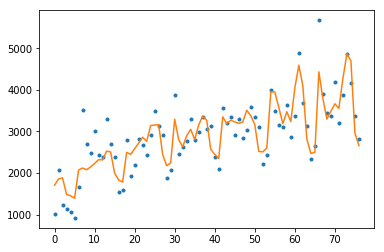

In [53]:
plt.plot(data['txleads'],'.',
        txols.predict(data),'-')

In [54]:
print ("TX Model 1")
txols1 = smf.ols('txleads ~ txoffstock*txonstock + natoffon + juldummy + seasq2 + seasq3 + seasq4', data=data).fit()
print (txols1.summary())

TX Model 1
                            OLS Regression Results                            
Dep. Variable:                txleads   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     33.03
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           1.50e-20
Time:                        17:33:14   Log-Likelihood:                -568.97
No. Observations:                  77   AIC:                             1156.
Df Residuals:                      68   BIC:                             1177.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            

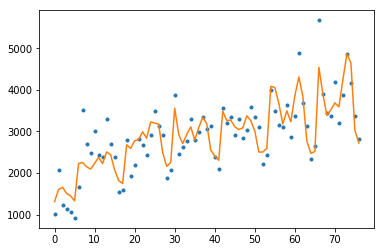

In [55]:
plt.plot(data['txleads'],'.',
        txols1.predict(data),'-')

In [60]:
t.predict(pdata)

0     4558.336225
1     5893.087012
2     4505.897542
3     4010.539979
4     3057.146439
5     3083.847742
6     7962.305702
7     4609.094318
8     5034.415817
9     4107.673791
10    5097.732683
11    4141.511575
dtype: float64

In [61]:
print ("TX Model 2")
txols2 = smf.ols('txleads ~ txoffstock + txonstock + natoffon + seasq2 + seasq3 + seasq4', data=data).fit()
print (txols2.summary())

TX Model 2
                            OLS Regression Results                            
Dep. Variable:                txleads   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     43.36
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           1.11e-21
Time:                        17:37:31   Log-Likelihood:                -570.33
No. Observations:                  77   AIC:                             1155.
Df Residuals:                      70   BIC:                             1171.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1531.2132    173.924      8.8

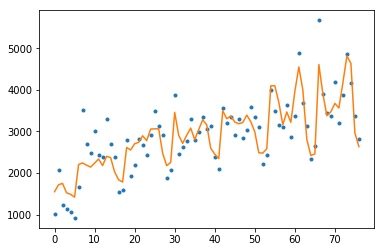

In [62]:
plt.plot(data['txleads'],'.',
        txols2.predict(data),'-')

In [63]:
txols2.predict(pdata)

0     4237.951310
1     5463.571983
2     4535.668767
3     3959.563888
4     2992.248177
5     2948.723600
6     7443.638261
7     4365.773589
8     4753.059862
9     3893.420012
10    4796.248373
11    3914.759265
dtype: float64

# Washington

Original R2: 0.77

In [64]:
print ("WA Original Model")
waols = smf.ols('waleads ~ waoffstock + waonstock + natoffon + juldummy + seasq1 + seasq2 + seasq4', data=data).fit()
print (waols.summary())

WA Original Model
                            OLS Regression Results                            
Dep. Variable:                waleads   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     49.01
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           2.56e-24
Time:                        17:39:22   Log-Likelihood:                -494.64
No. Observations:                  77   AIC:                             1005.
Df Residuals:                      69   BIC:                             1024.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1396.3355     88.849  

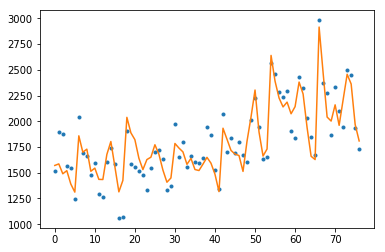

In [65]:
plt.plot(data['waleads'],'.',
        waols.predict(data),'-')

In [66]:
print ("WA Model 1")
waols1 = smf.ols('waleads ~ waoffstock*waonstock + natoffon + juldummy + seasq1 + seasq2 + seasq4', data=data).fit()
print (waols1.summary())

WA Model 1
                            OLS Regression Results                            
Dep. Variable:                waleads   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     43.00
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           1.16e-23
Time:                        17:39:24   Log-Likelihood:                -494.09
No. Observations:                  77   AIC:                             1006.
Df Residuals:                      68   BIC:                             1027.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            

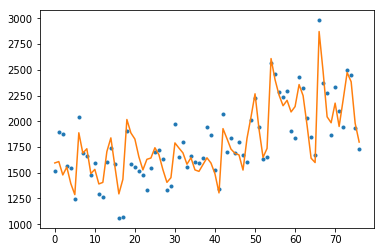

In [67]:
plt.plot(data['waleads'],'.',
        waols1.predict(data),'-')

In [72]:
waols1.predict(pdata)

0     2282.289618
1     2701.622936
2     2631.184288
3     2301.183064
4     1869.508289
5     1840.653055
6     3673.983549
7     2459.393762
8     2648.306866
9     2247.675184
10    2558.044692
11    2455.575712
dtype: float64

In [68]:
print ("WA Model 2")
waols2 = smf.ols('waleads ~ waoffstock + waonstock + natoffon + juldummy + seasq1 + seasq2 + seasq4', data=data).fit()
print (waols2.summary())

WA Model 2
                            OLS Regression Results                            
Dep. Variable:                waleads   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     49.01
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           2.56e-24
Time:                        17:40:42   Log-Likelihood:                -494.64
No. Observations:                  77   AIC:                             1005.
Df Residuals:                      69   BIC:                             1024.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1396.3355     88.849     15.7

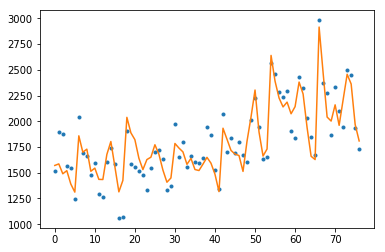

In [69]:
plt.plot(data['waleads'],'.',
        waols2.predict(data),'-')

In [70]:
waols2.predict(pdata)

0     2371.085853
1     2800.786761
2     2694.463531
3     2293.350766
4     1868.891265
5     1862.837073
6     3678.363743
7     2488.561750
8     2667.269354
9     2275.072948
10    2590.946991
11    2437.538226
dtype: float64